<a href="https://colab.research.google.com/github/flyinglower/Modeling-spread-speed-of-RIFA/blob/main/Spread_Speed_heat_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
files.upload()



Mounted at /content/drive


Saving cities - copy.xlsx to cities - copy.xlsx


{'cities - copy.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00t6Z\xa6z\x01\x00\x00\x84\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
import pandas as pd
from scipy.optimize import curve_fit

cities = pd.read_excel('cities - copy.xlsx')

places = [ cities.iloc[0,5:29].tolist(),
 cities.iloc[1,5:29].tolist(),
 cities.iloc[2,5:29].tolist(),
 cities.iloc[3,5:29].tolist(),
 cities.iloc[4,5:29].tolist(),
 cities.iloc[5,5:29].tolist(),
 cities.iloc[6,5:29].tolist(),
 cities.iloc[7,5:29].tolist(),
 cities.iloc[8,5:29].tolist(),
 cities.iloc[9,5:29].tolist(),
 cities.iloc[10,5:29].tolist(),
 cities.iloc[11,5:29].tolist(),
 cities.iloc[12,5:29].tolist(),#Wuhan
 cities.iloc[13,5:29].tolist(),
 cities.iloc[14,5:29].tolist(),
 cities.iloc[15,5:29].tolist(),
 cities.iloc[16,5:29].tolist(),#Beijing
 cities.iloc[17,5:29].tolist(),#Zhengzhou
 cities.iloc[18,5:29].tolist(),#Lhasa
 cities.iloc[19,5:29].tolist(),#Kunming
 cities.iloc[20,5:29].tolist(),#Guiyang
 cities.iloc[21,5:29].tolist(),#Xi'an
 cities.iloc[22,5:29].tolist(),#Taiyuan
 cities.iloc[23,5:29].tolist(),#NAnjing
 cities.iloc[24,5:29].tolist(),#Guanghou
 cities.iloc[25,5:29].tolist(),#Haikou
 cities.iloc[26,5:29].tolist(),#Changsha
 cities.iloc[27,5:29].tolist(),#Fuzhou
 cities.iloc[28,5:29].tolist()]#Chongqing

print(places)




[[0.1, 2.0, 6.6, 10.9, 14.6, 18.4, 20.8, 20.3, 16.6, 12.0, 6.7, 1.7, 7.8, 9.9, 15.1, 20.1, 24.3, 27.8, 30.3, 30.2, 25.7, 20.7, 14.8, 9.3], [3.1, 4.8, 9.2, 14.2, 18.3, 21.6, 24.5, 24.2, 19.6, 15.5, 10.0, 5.0, 9.7, 12.1, 17.6, 23.1, 27.3, 30.3, 33.2, 32.8, 28.5, 23.6, 17.0, 11.5], [1.9, 4.2, 8.3, 12.8, 16.3, 20.1, 22.2, 22.2, 18.5, 14.0, 8.8, 3.5, 8.8, 11.4, 16.5, 21.5, 25.9, 29.3, 31.9, 32.5, 28.5, 23.4, 16.7, 10.5], [2.0, 3.6, 7.4, 13.3, 17.8, 21.5, 24.1, 23.9, 19.8, 14.6, 9.2, 4.1, 8.6, 10.7, 15.1, 22.0, 26.6, 29.7, 32.3, 32.2, 27.8, 22.6, 16.7, 11.2], [3.7, 5.3, 8.9, 14.8, 19.2, 23.1, 25.4, 25.4, 21.1, 15.9, 10.5, 5.7, 9.0, 10.5, 15.0, 21.7, 26.5, 30.2, 33.4, 32.6, 28.5, 23.3, 17.6, 12.4], [5.3, 7.8, 11.2, 15.3, 18.8, 21.7, 22.5, 22.2, 19.5, 16.0, 11.5, 6.1, 11.9, 14.7, 18.0, 22.8, 26.7, 28.5, 30.2, 30.9, 28.8, 25.5, 20.0, 14.1], [3.5, 5.1, 8.7, 14.7, 19.5, 23.2, 25.9, 25.5, 21.5, 16.2, 10.6, 5.6, 9.0, 10.7, 14.8, 21.8, 27.0, 30.7, 34.3, 33.6, 29.0, 23.6, 17.8, 12.5], [2.6, 4.3, 7.9,

[33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33]
4.335301066062508
13.525841958825438
43.629824195938255
4.336881168418592
13.478119065096553
43.34080490281473
4.195451560500911
13.132545281359135
43.0230582460065
4.017476755976452
12.819290125662231
42.83358816519314
3.7755687807383955
11.372193695183565
41.99840648597153


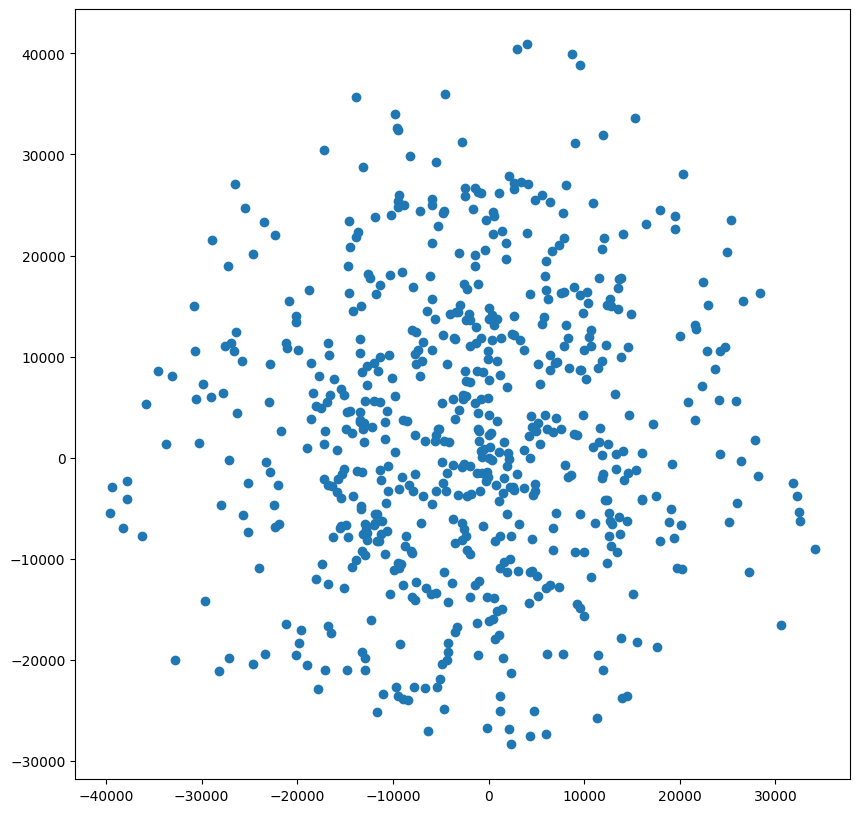

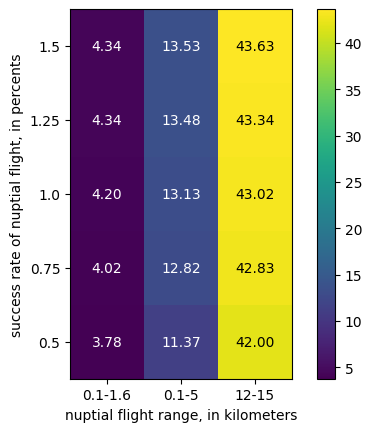

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


# Parameters
initial_colony = [0, 0, 0]
simulation_months = 12*10
simulation_times = 10
place = places[27]
number_of_queen =[int(1900*1.5/100),int(1900*1.25/100),int(1900*1/100),int(1900*0.75/100),int(1900*0.5/100)]
spread_distance = [[100,1600],[100,5000],[12000,15000]]

# Calculate the growth time for a new colony
def growth_time(colony):
  development = 0
  i = 0
  while -99 <= development < 1:
    speed = 0
    if place[i%12] < -2:
      speed = -100
    elif place[i%12] + place[i%12 + 12] < 8:
      speed = -0.0649
    elif 8 <= place[i%12] + place[i%12 + 12] < 42:
      speed = -0.0649
    elif 42 <= place[i%12] + place[i%12 + 12] < 64:
      speed = 0.0227* (place[i%12] + place[i%12 + 12])/2 - 0.4772
    else:
      speed = 0.08333
    development += speed
    i += 1
  if development <= -99:
    return simulation_months
  else:
    return i

def remove_duplicates(input_list):
    seen = set()
    result = []

    for item in input_list:
        x, y, z = item
        if (x, y) not in seen:
            seen.add((x, y))
            result.append(item)

timeneed=[]
for i in range(12):
  timeneed.append(growth_time([0,0,i]))
print(timeneed)


spread_all = np.zeros((len(number_of_queen),len(spread_distance)))
for m in range(len(number_of_queen)):
  for n in range(len(spread_distance)):
    # Simulate the flight of an ant queen
    def fly_ant_queen(colony,begin_day):
      angle = np.random.uniform(0, 2 * np.pi)
      distance = np.random.uniform(spread_distance[n][0], spread_distance[n][1])
      new_x = colony[0] + distance * np.cos(angle)
      new_y = colony[1] + distance * np.sin(angle)
      return [new_x, new_y, begin_day]
    num_queens_per_colony = number_of_queen[m]

    max_distance = []
    for _ in range(simulation_times):

      # Initialize the colonies list with the first colony
      colonies = [initial_colony]

      # Simulate the expansion of the ant colonies
      for month in range(simulation_months):
          new_queens = []
          new_colonies = []
          potential_colony = []
          for colony in colonies:
            if (month - colony[2] - timeneed[colony[2]%12]) % 12 == 0 and month - colony[2] - timeneed[colony[2]%12] >= 0:
              for _ in range(num_queens_per_colony):
                  new_queen = fly_ant_queen(colony, month)
                  potential_colony.append(new_queen)
                  new_queens.append(new_queen)
      # Filter out some new queens that are too near
          for new_queen in new_queens:
            count = 0
            for another in new_queens:
              if (new_queen[0]-another[0])**2+(new_queen[1]-another[1])**2 < 10**2:
                queen_need_remove=np.random.choice([0,1])
                if queen_need_remove == 0:
                  new_queens.remove(new_queen)
                  break
                else:
                  new_queens.remove(another)
                  break

          for new_queen in new_queens:
            count = 0
            for colony in colonies:
              if (new_queen[0]-colony[0])**2+(new_queen[1]-colony[1])**2 < 10**2:
                count += 1
            if count == 0:
              new_colonies.append(new_queen)
          colonies.extend(new_colonies)


      # Filter out colonies that have not grown yet
      final_colonies = [colony for colony in colonies if colony not in new_colonies]
      max = 0
      for colony in final_colonies:
        if (colony[0]**2 + colony[1]**2)**0.5 > max:
          max = (colony[0]**2 + colony[1]**2)**0.5
          max_angle = np.arctan(colony[1]/colony[0])
      max_distance.append(max)
    print(sum(max_distance)/len(max_distance)/1000)
    spread_all[m,n]=sum(max_distance)/len(max_distance)/1000
# Visualization
plt.figure(figsize=(10, 10))
x_values = [colony[0] for colony in final_colonies]
y_values = [colony[1] for colony in final_colonies]
plt.scatter(x_values, y_values, alpha = 1)
plt.savefig('output.png', transparent=True)
plt.show()


data = spread_all
fig, ax = plt.subplots()
cax = ax.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(cax)
for i in range(data.shape[0]):
  for j in range(data.shape[1]):
    if data[i, j] < 15:
      ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white')
    else:
      ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='black')
ax.set_xlabel('nuptial flight range, in kilometers')
ax.set_ylabel('success rate of nuptial flight, in percents')

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['0.1-1.6', '0.1-5', '12-15'])
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(['1.5', '1.25', '1.0', '0.75', '0.5'])
plt.show()